# Welcome to Deep Learning! 

Welcome to SCM.256 H4 *Introduction to Deep Learning*! You're about to learn all you need to get started building your own deep neural networks. Using Keras and Tensorflow you'll learn how to:
- create a **fully-connected** neural network architecture
- apply neural nets to two classic ML problems which you have seen in H3: **regression** and **classification**
- train neural nets with **stochastic gradient descent**, and
- improve performance with **dropout**, **batch normalization**, and other techniques

The lectures will introduce you to these topics with fully-worked examples, and then in the labs on Thursday, you'll explore these topics in more depth and apply them to real-world datasets.

Let's get started!



## What is Deep Learning? 

Some of the most impressive advances in artificial intelligence in recent years have been in the field of *deep learning*. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? **Deep learning** is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability **neural networks** have become the defining model of deep learning.  Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.

## Setting Up the Workspace

In [1]:
#!pip install sklearn
import sklearn
sklearn.__version__

'1.2.2'

In [2]:

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import tensorflow as tf #made by google and tensor refers to matrixes

from tensorflow import keras #layer on top of tf to make it more user friendly. 
from tensorflow.keras import layers

from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler #scaler is required as things are more stable here. 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import set_config

# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)



<ipython-input-2-dc601972ef0f>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Loading the Data

The *Big Mart Sales Prediction* dataset consists of sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a model to predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Since we already explored the Big Mart data extensively before Study Trek and Spring Break, we simply run the next cell to display the first few rows of the columns of data that we want to use.

In [3]:
#import pandas as pd
df_sales = pd.read_csv('https://www.dropbox.com/s/yqaymhdf7bvvair/bigmart_sales_predictions.csv?dl=1')

#Keep only columns that we use as features for 
df_sales = df_sales[['Item_Visibility','Item_MRP','Item_Weight','Item_Outlet_Sales']]
df_sales.head(5)

,Item_Visibility,Item_MRP,Item_Weight,Item_Outlet_Sales
0,0.016047,249.8092,9.30,3735.1380
1,0.019278,48.2692,5.92,443.4228
2,0.016760,141.6180,17.50,2097.2700
3,0.000000,182.0950,19.20,732.3800
4,0.000000,53.8614,8.93,994.7052


You can get the number of rows and columns of a dataframe (or a Numpy array) with the `shape` attribute.

In [4]:
df_sales.shape # (rows, columns)

(8523, 4)

## Example - The Linear Unit as a Model 

Though individual neurons will usually only function as part of a larger network, it's often useful to start with a single neuron model as a baseline. Single neuron models are *linear* models. 

Let's think about how this might work on a dataset like *Big Mart Sales Prediction*. Training a model with `'Item_MRP'` (maximum retail price per SKU) as input and `'Item_Outlet_Sales'` (annual sales per store per SKU) as output, we might find the bias is `b= -12` and the weight is `w= 15`. We could estimate the annual sales of a particular SKU at a particular store with maximum retail price 249.8 monetary units like this:

<figure style="padding: 1em;">
<img src="https://i.ibb.co/jw8Y8dL/Untitled.png" width="1000" alt="Computing with the linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>Computing with the linear unit.
</center></figcaption>
</figure>

And, checking against our formula, we have $sales = 15 \times 249.8 -12 = 3735$, just like we expect.




---
# 1. A Single Neuron

## The Linear Unit 

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with one input looks like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mfOlDR6.png" width="250" alt="Diagram of a linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>The Linear Unit: y = w x + b
</center></figcaption>
</figure>

The input is `x`. Its connection to the neuron has a **weight** which is `w`. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input `x`, what reaches the neuron is `w * x`. A neural network "learns" by modifying its weights.

The `b` is a special kind of weight we call the **bias**. The bias doesn't have any input data associated with it; instead, we put a `1` in the diagram so that the value that reaches the neuron is just `b` (since `1 * b = b`). The bias enables the neuron to modify the output independently of its inputs.

The `y` is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is `y = w * x + b`, or as a formula $y = w x + b$.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Does the formula y = w x + b look familiar?</strong><br>
It's an equation of a line! 

It is the slope-intercept equation, where <code>w</code> is the slope and <code>b</code> is the y-intercept. 
</blockquote>

## Multiple Inputs 

The *Big Mart Sales Prediction* dataset has many more features than just `'Item_MRP'`. What if we wanted to expand our model to include things like item visibility or item weight? That's easy enough. We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/vyXSnlZ.png" width="300" alt="Three input connections: x0, x1, and x2, along with the bias.">
<figcaption style="textalign: center; font-style: italic"><center>A linear unit with three inputs.
</center></figcaption>
</figure>

The formula for this neuron would be $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

## Linear Units in Keras

The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of *layers*. We can create models like those above using a *dense* layer (which we'll learn more about soon in lecture).

We could define a linear model accepting three input features (`'Item_MRP'`, `'Item_visibility'`, and `'Item_weight'`) and producing a single output (`'Item_Outlet_Sales'`) like this:

In [ ]:
#from tensorflow import keras
#from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

With the first argument, `units`, we define how many outputs we want. In this case we are just predicting `'Item_Outlet_Sales'`, so we'll use `units=1`. 

With the second argument, `input_shape`, we tell Keras the dimensions of the inputs. Setting `input_shape=[3]` ensures the model will accept three features as input (`'Item_MRP'`, `'Item_Visibility'`, and `'Item_Weight'`).

This model is now ready to be fit to training data!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Why is <code>input_shape</code> a Python list?</strong><br>
The data we'll use in this notebook will be tabular data, like in a Pandas dataframe. We'll have one input for each feature in the dataset. The features are arranged by column, so we'll always have <code>input_shape=[num_feature_columns]</code>.

The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: <code>[height, width, channels]</code>.
</blockquote>

## Optional: Plot the Output of an Untrained Linear Model
 
The *Big Mart Sales Prediction* problem is a *regression* problem, where the goal is to predict a numeric target: `'Item_Output_sales'`. Regression problems are like "curve-fitting" problems: we're trying to find a curve that best fits the data. Let's take a look at the "curve" produced by a linear model. (You've probably guessed that it's a line!)
 
We mentioned that before training a model's weights are set randomly. Run the cell below a few times to see the different lines produced with a random initialization. (There's no coding for this exercise -- it's just a demonstration.)

4/4 [==============================] - 0s 3ms/step


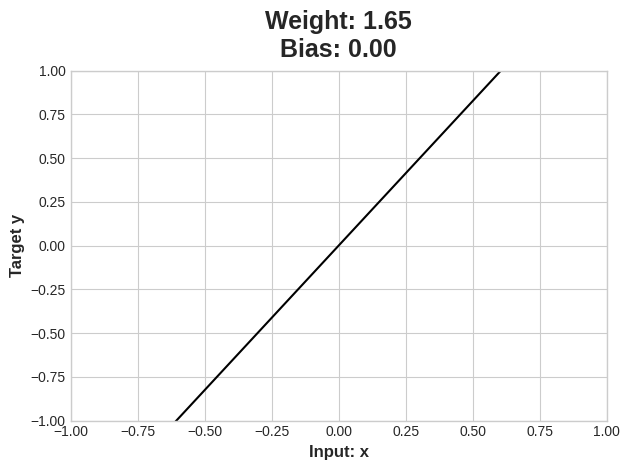

In [12]:
#import tensorflow as tf
#import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>What is a <code>tensor</code> in Keras?</strong><br>
Internally, Keras represents the weights of a neural network with <strong>tensors</strong>. Keras also uses tensors to represent data. When you set the <code>input_shape</code> argument, you are telling Keras the dimensions of the array it should expect for each example in the training data.

Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit) and [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit) accelerators. TPUs, in fact, are designed specifically for tensor computations.
</blockquote>

### In Lab: *Define a Linear Model*

We have seen that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). 

In lab on Thursday, you'll build a linear model and get some practice working with models in Keras.

1.   Declare Input Shape
2.   Define a Linear Model
3.   Inspect Weights 


---
# 2. Deep Neural Networks

In this section we're going to see how we can build neural networks capable of learning the complex kinds of relationships deep neural nets are famous for.

The key idea here is *modularity*, building up a complex network from simpler functional units. We've seen how a linear unit computes a linear function -- now we'll see how to combine and modify these single units to model more complex relationships.


## Layers

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Many Kinds of Layers</strong><br>
A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of <em>data transformation</em>. Many layers, like the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D">convolutional</a> and <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN">recurrent</a> layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding">feature engineering</a> or just <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">simple arithmetic</a>. 

There's a whole world of layers to discover -- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">check them out</a> in the Keras documentation!
</blockquote>



## The Activation Function 

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something *nonlinear*. What we need are activation functions.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/OLSUEYT.png" width="400" alt=" ">
<figcaption style="textalign: center; font-style: italic"><center>Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions. 
</center></figcaption>
</figure>

An **activation function** is simply some function we apply to each of a layer's outputs (its *activations*). The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="A graph of the rectifier function. The line y=x when x>0 and y=0 when x<0, making a 'hinge' shape like '_/'.">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a *bend* in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

## Stacking Dense Layers

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.


## Building Sequential Models 

The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [14]:
#from tensorflow import keras
#from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]), #input is X. w and b is not inputs. 
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1), #units is number of outputs
])

Be sure to pass all the layers together in a list, like `[layer, layer, layer, ...]`, instead of as separate arguments. To add an activation function to a layer, just give its name in the `activation` argument.

## Alternatives to ReLU

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the Keras [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

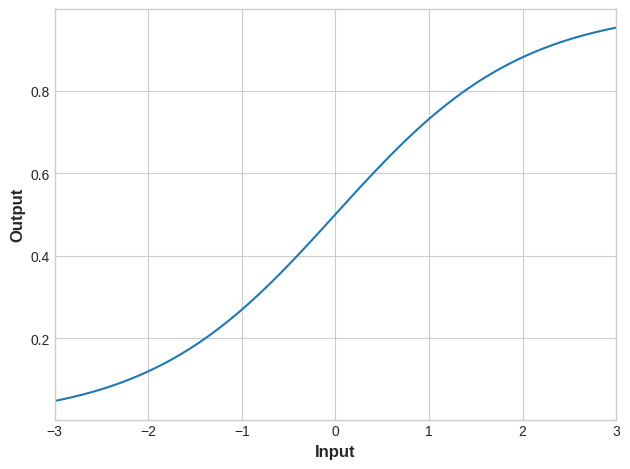

In [19]:
### YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('sigmoid') #type anything here and see the difference here. 

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

### In Lab: *Create a Deep Neural Network*

We have seen how to build deep neural networks by stacking layers inside a `Sequential` model. By adding an *activation function* after the hidden layers, we gave the network the ability to learn more complex (non-linear) relationships in the data.

In lab on Thursday, you'll build a neural network with several hidden layers and then explore some activation functions beyond ReLU. 

1.   Define a Neural Model with Hidden Layers
2.   Explore Activation Layers


---
# 3. Stochastic Gradient Descent

In the first two sections, we learned how to build fully-connected networks out of stacks of dense layers. When first created, all of the network's weights are set randomly -- the network doesn't "know" anything yet. In this lesson we're going to see how to train a neural network; we're going to see how neural networks *learn*.

As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target. In the *Big Mart Sales Prediction* dataset, for instance, we want a network that can take each product's `'Item_MRP'`, `'Item_Visibility'`, and `'Item_Weight'` value and produce a prediction for that product's `'Item_Outlet_Sales'` per store. If we can successfully train a network to do that, its weights must represent in some way the relationship between those features and that target as expressed in the training data.

In addition to the training data, we need two more things:
- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

## The Loss Function

We've seen how to design an architecture for a network, but we haven't seen how to tell a network *what* problem to solve. This is the job of the loss function.

The **loss function** measures the disparity between the the target's true value and the value the model predicts. 

Different problems call for different loss functions. We have been looking at **regression** problems, where the task is to predict some numerical value -- annual sales per SKU per store in *Big Mart Sales Prediction*. 

What are other regression tasks that you can think of in Supply Chain Management?

A common loss function for regression problems is the **mean absolute error** or **MAE**. For each prediction `y_pred`, MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

The total MAE loss on a dataset is the mean of all these absolute differences.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/VDcvkZN.png" width="500" alt="A graph depicting error bars from data points to the fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>The mean absolute error is the average length between the fitted curve and the data points.
</center></figcaption>
</figure>

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras). The Huber loss is less sensitive to outliers in data than the squared error loss.

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

## The Optimizer - Stochastic Gradient Descent

We've described the problem we want the network to solve, but now we need to say *how* to solve it. This is the job of the **optimizer**. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent**. They are iterative algorithms that train a network in steps. One **step** of training goes like this:
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rFI1tIk.gif" width="1600" alt="Fitting a line batch by batch. The loss decreases and the weights approach their true values.">
<figcaption style="textalign: center; font-style: italic"><center>Training a neural network with Stochastic Gradient Descent.
</center></figcaption>
</figure>

Each iteration's sample of training data is called a **minibatch** (or often just "batch"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

The animation shows a linear model being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (`w` the slope and `b` the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

## Learning Rate and Batch Size

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

## Adding the Loss and Optimizer

After defining a model, you can add a loss function and optimizer with the model's `compile` method:

In [ ]:
model.compile(
    optimizer="adam",
    loss="mae",
)

Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>What's In a Name?</strong><br>
The <strong>gradient</strong> is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change <em>fastest</em>. We call our process gradient <strong>descent</strong> because it uses the gradient to <em>descend</em> the loss curve towards a minimum. <strong>Stochastic</strong> means "determined by chance." Our training is <em>stochastic</em> because the minibatches are <em>random samples</em> from the dataset. And that's why it's called SGD!
</blockquote>

## Example - Big Mart Sales Prediction

Now we know everything we need to start training deep learning models. So let's see it in action! We'll use the *Big Mart Sales Prediction* dataset.

We've put all of the data preparation into this next cell. This will be discussed in detail in lab. One thing you might note for now though is that we've rescaled each feature with sklean's `StandardScaler`. As we'll discuss later next week, neural networks tend to perform best when their inputs are on a common scale.

In [20]:
#import pandas as pd
#import numpy as np
#from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.impute import SimpleImputer

# Define target and features
target = "Item_Outlet_Sales"
y = df_sales[target].copy()
X = df_sales.drop(columns=[target]).copy()

# Create training and validation splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
display(X_train.head())

#Establish a pipeline for numerical features
num_features = ['Item_Weight','Item_Visibility','Item_MRP']
num_pipe = Pipeline(steps=[
    ('simpleimputer', SimpleImputer()),
    ('standardscaler', StandardScaler())])

#Create switch to correctly route each column to the correct pipeline
preprocessor = make_column_transformer(
    (num_pipe, num_features), verbose_feature_names_out=False)
display(preprocessor)

#Fit each step in our pipeline to the training data
preprocessor.fit(X_train)

#Now we can transform our features, with the steps specified in the pipeline
Xprocessed_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
Xprocessed_test_df = pd.DataFrame(preprocessor.transform(X_test),
                                  columns=preprocessor.get_feature_names_out(),
                                  index=X_test.index)
display(Xprocessed_train_df.head())

# make back-up copy of original train target and validation target
y_train_orig = y_train 
y_test_orig = y_test 

#Log transform target instead of standardizing
y_train = np.log(y_train)

,Item_Visibility,Item_MRP,Item_Weight
7477,0.120256,39.2506,8.365
5089,0.015944,231.9668,13.650
6992,0.000000,89.8856,14.300
6264,0.041803,34.8216,12.350
4374,0.031963,178.0344,6.380


ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility',
                                  'Item_MRP'])],
                  verbose_feature_names_out=False)

,Item_Weight,Item_Visibility,Item_MRP
7477,-1.065209,1.058290,-1.629769
5089,0.184914,-0.971558,1.461938
6992,0.338666,-1.281811,-0.817442
6264,-0.122590,-0.468364,-1.700823
4374,-1.534745,-0.659836,0.596711


How many inputs should this network have? We can discover this by looking at the number of columns in the data matrix. Be sure not to include the target (`'Item_Outlet_Sales'`) here -- only the input features.

In [21]:
print(Xprocessed_train_df.shape)

(6392, 3)


In [22]:
input_shape = [Xprocessed_train_df.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [3]


Three columns means three inputs.

We've chosen a three-layer network with 192 neurons. This network should be capable of learning moderately complex relationships in the data.

In [23]:
#from tensorflow import keras
#from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.

In [24]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Now we're ready to start the training! We've told Keras to feed the optimizer 128 rows of the training data at a time (the `batch_size`) and to do that 200 times all the way through the dataset (the `epochs`).

In [25]:
history = model.fit(
    Xprocessed_train_df, y_train,
    batch_size=128,
    epochs=200,
    verbose=1, #suppress output since we'll plot the curves
)

Epoch 1/200
50/50 [==============================] - 1s 2ms/step - loss: 5.0063
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 1.6341
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 1.2867
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.9630
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6686
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6175
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6149
Epoch 8/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6123
Epoch 9/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6072
Epoch 10/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6075
Epoch 11/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6078
Epoch 12/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6042
Epoch 13/200
50/50 [=================

You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The `fit` method in fact keeps a record of the loss produced during training in a `History` object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

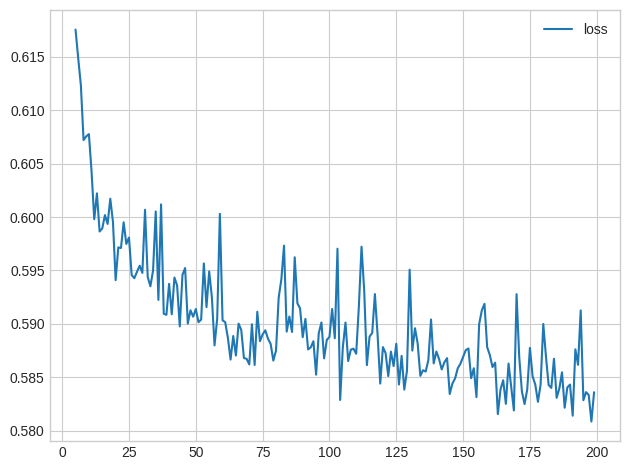

In [26]:
#import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
# start the plot at epoch 5 (you can change this to get a different view)
history_df.loc[5:,['loss']].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal, it means the model has learned all it can and there would be no reason continue for additional epochs.

### In Lab: *Use Stochastic Gradient Descent to Train your Neural Network*

We have seen how to train deep neural networks using `Stochastic Gradient Descent` (SGD). The *Optimizer* tells the network how to change its weights: **ADAM** is an SGD algorithm with an adaptive learning rate, suitable for many general problems. 

After adding a *Loss function* that measures how good the network's predictions are per iteration, we `fit` the model by choosing the number of records per mini-batch of data (`batch_size`) to feed to the optimizer per iteration, and the number of times the network will see each complete round of training data (`epoch`). 

In lab on Thursday, you'll train a deep neural network using ADAM and MAE loss, then explore the effect of the learning rate and batch size on SGD. 

1.   Add Loss Function and Optimizer
2.   Train Model
3.   Evaluate Training
4.   Explore Learning Rate and Batch Size
